In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from PIL import Image
from IPython.display import display, HTML
from pathlib import Path

In [5]:
df = pd.read_csv('data.csv')
df.head()

,person_id,person_name,age,sex,filepath
0,13965,DeborahKerr,42,f,../datasets/unofficial-agedb/AgeDB/13965_Debor...
1,15654,KatharineRoss,62,f,../datasets/unofficial-agedb/AgeDB/15654_Katha...
2,11721,OliviaHussey,62,f,../datasets/unofficial-agedb/AgeDB/11721_Olivi...
3,764,WEBDuBois,57,m,../datasets/unofficial-agedb/AgeDB/764_WEBDuBo...
4,11484,JulieAndrews,36,f,../datasets/unofficial-agedb/AgeDB/11484_Julie...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16488 entries, 0 to 16487
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person_id    16488 non-null  object
 1   person_name  16488 non-null  object
 2   age          16488 non-null  int64 
 3   sex          16488 non-null  object
 4   filepath     16488 non-null  object
dtypes: int64(1), object(4)
memory usage: 644.2+ KB


<AxesSubplot:>

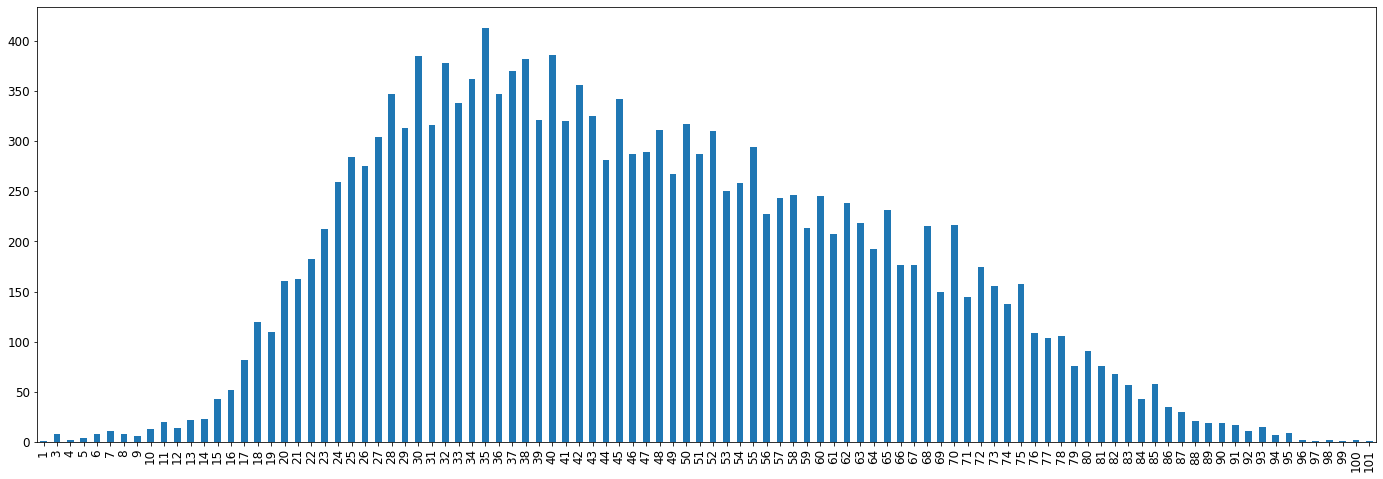

In [6]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [7]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [8]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  1.92%


In [14]:
samples = df.sample(n=18)
samples.head()

,person_id,person_name,age,sex,filepath
12067,6855,ThomasTerry,48,m,../datasets/unofficial-agedb/AgeDB/6855_Thomas...
2148,7202,JohnWayne,71,m,../datasets/unofficial-agedb/AgeDB/7202_JohnWa...
9462,14496,SusanHayward,25,f,../datasets/unofficial-agedb/AgeDB/14496_Susan...
3335,16345,Dee,24,f,../datasets/unofficial-agedb/AgeDB/16345_Dee_2...
3477,5242,DavidMcCallum,63,m,../datasets/unofficial-agedb/AgeDB/5242_DavidM...


In [15]:
def display_image_grid(df, n_rows, n_cols):
    """
    Displays a grid of images in a Jupyter Notebook using ImageGrid.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # create grid of axes
                     axes_pad=0.0,  # pad between axes in inches
                     )

    img_size=(300, 325)
    
    for ax, image_path in zip(grid, df['filepath']):
        image = Image.open(image_path).convert('RGB')
        image = image.resize(img_size, Image.ANTIALIAS)  # Resize image
        ax.imshow(image, cmap=None, interpolation='nearest')
        ax.axis('off')  # Turn off axis
    
    plt.show()

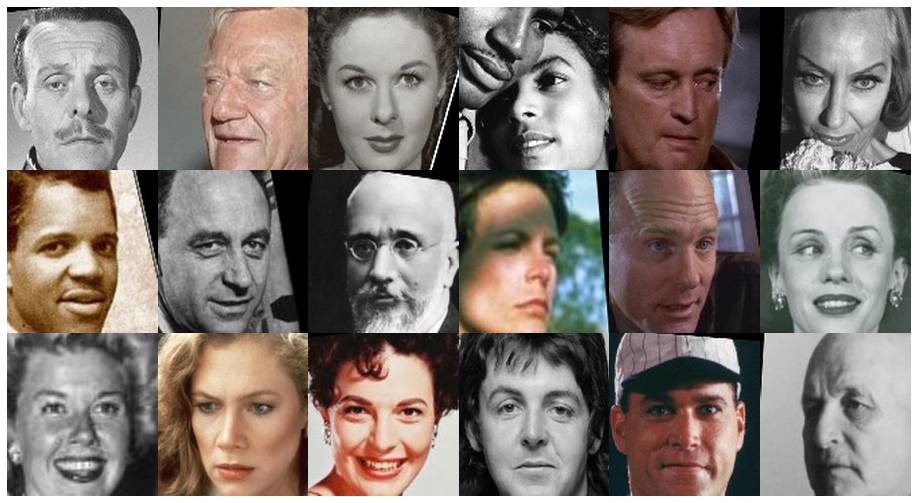

In [16]:
display_image_grid(samples, n_rows=3, n_cols=6)